In [4]:
import sys
import pandas as pd

customer_master=pd.read_csv('customer_master.csv')
item_master=pd.read_csv('item_master.csv')
transaction_1=pd.read_csv('transaction_1.csv')
transaction_detail_1=pd.read_csv('transaction_detail_1.csv')
transaction_2=pd.read_csv('transaction_2.csv')
transaction=pd.concat([transaction_1,transaction_2],ignore_index=True)
transaction_detail_2=pd.read_csv('transaction_detail_2.csv')
transaction_detail=pd.concat([transaction_detail_1,transaction_detail_2],ignore_index=True)

In [5]:
join_data=pd.merge(transaction_detail,transaction[["transaction_id","payment_date","customer_id"]],
                  on="transaction_id",how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [7]:
join_data=pd.merge(join_data,customer_master,on="customer_id",how="left")
join_data=pd.merge(join_data,item_master,on="item_id",how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


In [8]:
join_data["price"]=join_data["quantity"]*join_data["item_price"]
join_data[["quantity","item_price","price"]].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


In [9]:
join_data.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [10]:
join_data.dtypes

detail_id             int64
transaction_id       object
item_id              object
quantity              int64
payment_date         object
customer_id          object
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
item_name            object
item_price            int64
price                 int64
dtype: object

In [13]:
join_data["payment_date"]=pd.to_datetime(join_data["payment_date"])
join_data["payment_month"]=join_data["payment_date"].dt.strftime("%Y%m")
join_data[["payment_date","payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [14]:
join_data.groupby(["payment_month","item_name"]).sum()[["price","quantity"]]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [15]:
graph_data=pd.pivot_table(join_data,index="payment_month",columns="item_name",values="price",
                         aggfunc="sum")
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


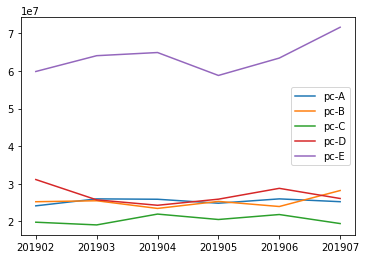

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(graph_data.index),graph_data["PC-A"],label="pc-A")
plt.plot(list(graph_data.index),graph_data["PC-B"],label="pc-B")
plt.plot(list(graph_data.index),graph_data["PC-C"],label="pc-C")
plt.plot(list(graph_data.index),graph_data["PC-D"],label="pc-D")
plt.plot(list(graph_data.index),graph_data["PC-E"],label="pc-E")
plt.legend()